## 案例1: 预测泰坦尼克号沉船事件中哪些人员会获救？

### 解决思路
1. 定义问题
2. 收集数据
3. 数据清洗
    - 纠正：异常值
    - 完整：补足缺失的值
    - 构建：新的特征
    - 转换：字段格式替换
4. 探索分析
5. 数据建模
6. 模型验证
7. 模型优化

#### 加载必要的库

In [4]:
# 加载必要的库
import sys
import pandas as pd
import numpy as np
import sklearn
import random
import time

In [5]:
from sklearn import ensemble

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# 设置应用风格
mpl.style.use("ggplot")

#### 加载原数据

In [9]:
# 读取原数据集
data_raw = pd.read_csv('train.csv')
# 读取测试集合
data_val = pd.read_csv('test.csv')

In [10]:
# 显示部分数据(默认五条)
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [14]:
# 列名称转换为小写
data_raw.columns = data_raw.columns.str.lower()
data_val.columns = data_val.columns.str.lower()

<Axes: ylabel='count'>

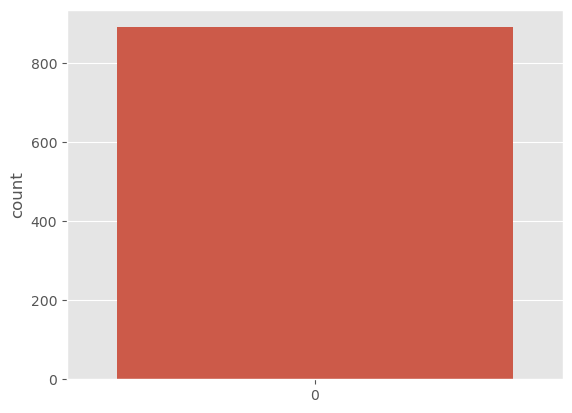

In [15]:
# 绘制图形
sns.countplot(data_raw['survived'])

In [16]:
# 合并两个数据集，进行统一的清洗
data_all = [data_raw, data_val]

In [17]:
# 查看哪些字段有空的值
data_raw.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [18]:
data_val.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [19]:
# 对源数据集进行描述
data_raw.describe(include='all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [20]:
# 对原始数据集（训练集+测试集）进行清理
for dataset in data_all:
    # 补足空缺值,inplace=True在原始表中进行修改
    dataset['age'].fillna(dataset['age'].median(), inplace=True)
    dataset['fare'].fillna(dataset['fare'].median(), inplace=True)
    # 返回这个数据集合中出现频率最高的
    dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)

In [21]:
# 删除一些字段
drop_columns = ['cabin', 'passengerid', 'ticket']

data_raw.drop(drop_columns, axis=1, inplace=True)
data_val.drop(drop_columns, axis=1, inplace=True)

In [22]:
data_val.isnull().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

#### 特征构建

In [23]:
for dataset in data_all:
    # 构建新的字段:
    # 1. family_size家庭规模：sibsp + parch + 1(自己)
    dataset['family_size'] = dataset['sibsp'] + dataset['parch'] + 1
    # 2. 单身与否：single, 1单身，0非单身
    dataset['single'] = 1
    dataset['single'].loc[dataset['family_size'] > 1] = 0 # 家庭规模大于1则不是单身
    # 3. 身份 title
    dataset['title'] = dataset['name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    # dataset['title'] = dataset['name'].apply(lambda x : x.split(',')[1].apply(lambda x : x.split('.'))[0])
    # 4. 票价 fare_bin
    dataset['fare_bin'] = pd.qcut(dataset['fare'], 4)# 根据票价分成四组，每组的元素个数一致
    # 5. age_bin
    dataset['age_bin'] = pd.cut(dataset['age'].astype(int), 5) # 根据年龄分组分成5组，每组元素不一致
    

/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_53222/3900890460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['single'].loc[dataset['family_size'] > 1] = 0 # 家庭规模大于1则不是单身
/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_53222/3900890460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['single'].loc[dataset['family_size'] > 1] = 0 # 家庭规模大于1则不是单身


In [24]:
dataset.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


In [25]:
# 根据title统计人数
data_raw['title'].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [26]:
title_names = (data_raw['title'].value_counts() < 10)
# 将称谓所在小于10的数据，全部归为一类：other
data_raw['title'] = data_raw['title'].apply(lambda x : 'other' if title_names[x] else x)

In [27]:
data_raw['survived'].groupby(data_raw['title']).mean() # 在被获救的里面根据title来分类

title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: survived, dtype: float64

#### 构建新的字段，基于scikit-learn中的LabelEncoder()

In [28]:
label = LabelEncoder()

In [29]:
for dataset in data_all:
    # 1. 新字段：sex_code
    dataset['sex_code'] = label.fit_transform(dataset['sex'])
    # 2. 新字段：embarked_code
    dataset['embarked_code'] = label.fit_transform(dataset['embarked'])
    # 3. 新字段：title_code
    dataset['title_code'] = label.fit_transform(dataset['title'])
    # 4. 新字段：age_bin_code
    dataset['age_bin_code'] = label.fit_transform(dataset['age'])
    # 5. 新字段：fare_bin_code
    dataset['fare_bin_code'] = label.fit_transform(dataset['fare'])

In [30]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin,sex_code,embarked_code,title_code,age_bin_code,fare_bin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,28,18
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,51,207
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,34,41
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,47,189
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,47,43


#### 方式一：特征选择

In [31]:
Target = ['survived'] # 标签

In [32]:
data_columns_one = ['sex', 'pclass', 'embarked', 'title', 'sibsp', 'parch', 'age', 'fare', 'family_size', 'single']

In [33]:
columns_one = Target + data_columns_one

#### 方式二：特征选择

In [34]:
data_columns_two = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'sibsp', 'parch', 'age', 'fare']

In [35]:
columns_two = Target + data_columns_two

#### 方式三：特征选择

In [36]:
data_columns_three = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'family_size', 'age_bin_code', 'fare_bin_code']

In [37]:
columns_three = Target + data_columns_three

#### 通过Pandas中的get_dummise()进行编码

In [38]:
data_one_dummy = pd.get_dummies(data_raw[data_columns_one])

In [39]:
data_one_dummy_list = data_one_dummy.columns.tolist()

In [40]:
data_one_dummy_list

['pclass',
 'sibsp',
 'parch',
 'age',
 'fare',
 'family_size',
 'single',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_other']

#### 获取训练集和测试集

##### 方式一：训练集和测试集合

In [41]:
X_train_one, X_text_one, y_train_one, y_test_one = model_selection.train_test_split(data_one_dummy[data_one_dummy_list], 
                                                                    data_raw[Target], 
                                                                    random_state=0)

In [42]:
X_train_one.shape

(668, 17)

##### 方式二：训练集和测试集合

In [43]:
X_train_two, X_text_two, y_train_two, y_test_two = model_selection.train_test_split(data_raw[data_columns_two], 
                                                                    data_raw[Target], 
                                                                    random_state=0)

In [44]:
X_train_two.shape

(668, 8)

##### 方式三：训练集和测试集合

In [45]:
X_train_three, X_text_three, y_train_three, y_test_three = model_selection.train_test_split(data_raw[data_columns_three], 
                                                                    data_raw[Target], 
                                                                    random_state=0)

In [46]:
X_train_three.shape

(668, 7)

### 随机森林算法

In [47]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(random_state=1,
                            n_jobs=-1)

In [49]:
param_gird = {
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[1, 5, 10],
    'min_samples_split':[2, 4, 10, 12, 16],
    'n_estimators': [50, 100, 400, 700, 1000]
}

In [50]:
gs = GridSearchCV(estimator=rf,
                  param_grid=param_gird,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

#### 对特征一进行训练

In [51]:
gs = gs.fit(X_train_one, y_train_one)

/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

In [52]:
print(gs.best_score_)

0.8323839534601868


In [53]:
print(gs.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}


In [54]:
# 创建一个对象
rf2 = RandomForestClassifier(criterion='entropy',
                            min_samples_leaf=5,
                            min_samples_split=12,
                            n_estimators=50,
                            n_jobs=-1,
                            random_state=1)

In [55]:
rf2.fit(X_train_one, y_train_one)

/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=50, n_estimators=50, n_jobs=-1,
                       random_state=1)

In [56]:
# 预测
# 根据特征的重要性排序
pd.concat((pd.DataFrame(X_train_one.iloc[:, 1:].columns, columns=['Variable']),
           pd.DataFrame(rf2.feature_importances_, columns=['importance'])),
           axis=1).sort_values(by='importance', ascending=False)

,Variable,importance
7,sex_male,0.212480
14,title_Mrs,0.180482
8,embarked_C,0.147227
0,sibsp,0.103547
4,family_size,0.079957
3,fare,0.068311
5,single,0.054103
15,title_other,0.044172
1,parch,0.031730
13,title_Mr,0.017281


#### 在test上进行预测

In [57]:
pred = rf2.predict(X_text_one)

In [58]:
pred_df = pd.DataFrame(pred, columns=['survived'])

In [59]:
pred_df.head()

,survived
0,0
1,0
2,0
3,1
4,1


----

In [ ]:

# 数据预处理
# 删除缺失值
#data.dropna(subset=['rfs_event', 'rfs_months', 'os_months', 'os_event'], inplace=True)

# 特征和目标
#X = data[['rfs_event', 'rfs_months', 'os_months']]
#y = data['os_event']

# 特征缩放
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# 将数据分为训练集和测试集
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 初始化并训练随机森林分类器
#model = RandomForestClassifier(n_estimators=200, random_state=0)
#model.fit(X_train, y_train)

# 预测测试集
#predictions = model.predict(X_test)
#prediction_probabilities = model.predict_proba(X_test)[:, 1]  # 获取死亡的概率

# 评估模型的分类性能
#accuracy = accuracy_score(y_test, predictions)
#roc_auc = roc_auc_score(y_test, prediction_probabilities)

# 输出模型性能
#print(f'Model Accuracy: {accuracy:.2f}')
#print(f'ROC AUC Score: {roc_auc:.2f}')